In [1]:
# !python -m pip install spacy
# !python -m spacy download pt

In [2]:
import pandas as pd

In [3]:
filmes = pd.read_csv("../../dados/imdb-reviews-pt-br.csv")

In [4]:
filmes["classify"] = filmes["sentiment"].replace(["neg", "pos"], [0, 1])

In [5]:
# from sklearn.linear_model import LogisticRegression
# reg_log = LogisticRegression()

In [6]:
filmes["text_minus"] = filmes["text_pt"].str.lower()

In [7]:
filmes["text_no_enter"] = filmes["text_minus"].replace(["\n", "\r", "\t", "\u200b"], [' ', ' ', ' ', ''])

In [8]:
import string
mytrans = str.maketrans("", "", string.punctuation)
filmes["text_no_punct"] = filmes["text_no_enter"].str.translate(mytrans)

In [9]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [10]:
# Remove os acentos
from unidecode import unidecode
filmes["text_no_accent"] = filmes["text_no_punct"].apply(unidecode)

In [11]:
counter_line = 0

def return_lemma( text ):
    global counter_line
    print("Lematizando : ", counter_line)
    doc = nlp(str([palavra for palavra in text]))
    doc_lemma = [token.lemma_ for token in doc if token.pos_ == 'NOUN']
    counter_line += 1
    if counter_line % 100 == 0:
        print("Lemmatizando linha: ", counter_line)
    return doc_lemma

In [12]:
# Lematização
# import spacy
# nlp = spacy.load("pt_core_news_sm")
# filmes['text_lemmatized'] = filmes["text_no_accent"].apply(return_lemma)

In [13]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
palavras_adicionais = ['entao', 'apenas', 'historia', 'enquanto', 'ainda', 'agora', 'porque', 'filme', 'filmes', '\u200b', 'nao', '', 'sobre']
stop_words.extend(palavras_adicionais)
stop_words.sort()

In [15]:
def remove_stop_words( texto ): 
    global stop_words
    lista_palavras = texto.split(" ")
    nova_lista = []
    for palavra in lista_palavras:
        if palavra not in stop_words:
            nova_lista.append(palavra)
    # print(nova_lista)
    return " ".join(nova_lista)

In [16]:
filmes["texto_no_stopwords"] = filmes["text_no_accent"].apply(remove_stop_words)

In [92]:
counter_lines = 0
def stemmer_func( texto ):
    global counter_lines
    counter_lines += 1
    if counter_lines % 1000 == 0:
        print("Processando linha: ", counter_lines)
    lista_palavras = texto.split(" ")
    nova_lista = []
    for palavra in lista_palavras:
        stemmed = stemmer.stem( palavra )
        nova_lista.append(stemmed)
    return " ".join(nova_lista)

In [29]:
stemmer = nltk.RSLPStemmer()
filmes["text_stemmed"] = filmes["texto_no_stopwords"].apply(stemmer_func)

Processando linha:  1000
Processando linha:  2000
Processando linha:  3000
Processando linha:  4000
Processando linha:  5000
Processando linha:  6000
Processando linha:  7000
Processando linha:  8000
Processando linha:  9000
Processando linha:  10000
Processando linha:  11000
Processando linha:  12000
Processando linha:  13000
Processando linha:  14000
Processando linha:  15000
Processando linha:  16000
Processando linha:  17000
Processando linha:  18000
Processando linha:  19000
Processando linha:  20000
Processando linha:  21000
Processando linha:  22000
Processando linha:  23000
Processando linha:  24000
Processando linha:  25000
Processando linha:  26000
Processando linha:  27000
Processando linha:  28000
Processando linha:  29000
Processando linha:  30000
Processando linha:  31000
Processando linha:  32000
Processando linha:  33000
Processando linha:  34000
Processando linha:  35000
Processando linha:  36000
Processando linha:  37000
Processando linha:  38000
Processando linha:  3

In [30]:
filmes

,id,text_en,text_pt,sentiment,classify,text_minus,text_no_enter,text_no_punct,text_no_accent,texto_no_stopwords,text_stemmed
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"mais uma vez, o sr. costner arrumou um filme p...","mais uma vez, o sr. costner arrumou um filme p...",mais uma vez o sr costner arrumou um filme por...,mais uma vez o sr costner arrumou um filme por...,vez sr costner arrumou tempo necessario alem t...,vez sr costn arrum temp necessari alem terri s...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,este é um exemplo do motivo pelo qual a maiori...,este é um exemplo do motivo pelo qual a maiori...,este é um exemplo do motivo pelo qual a maiori...,este e um exemplo do motivo pelo qual a maiori...,exemplo motivo maioria acao sao mesmos generic...,exempl motiv maior aca sao mesm gener chat ha ...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"primeiro de tudo eu odeio esses raps imbecis, ...","primeiro de tudo eu odeio esses raps imbecis, ...",primeiro de tudo eu odeio esses raps imbecis q...,primeiro de tudo eu odeio esses raps imbecis q...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,nem mesmo os beatles puderam escrever músicas ...,nem mesmo os beatles puderam escrever músicas ...,nem mesmo os beatles puderam escrever músicas ...,nem mesmo os beatles puderam escrever musicas ...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes de fotos de latão não é uma palavra apr...,filmes de fotos de latão não é uma palavra apr...,filmes de fotos de latão não é uma palavra apr...,filmes de fotos de latao nao e uma palavra apr...,fotos latao palavra apropriada verdade sao tan...,fot lata palavr apropri verdad sao tant ous qu...
...,...,...,...,...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"como a média de votos era muito baixa, e o fat...","como a média de votos era muito baixa, e o fat...",como a média de votos era muito baixa e o fato...,como a media de votos era muito baixa e o fato...,media votos baixa fato funcionario locadora ac...,med vot baix fat funcionari loc ach tud bem mu...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,o enredo teve algumas reviravoltas infelizes e...,o enredo teve algumas reviravoltas infelizes e...,o enredo teve algumas reviravoltas infelizes e...,o enredo teve algumas reviravoltas infelizes e...,enredo algumas reviravoltas infelizes inacredi...,enred algum reviravolt infeliz inacredita enta...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,estou espantado com a forma como este filme e ...,estou espantado com a forma como este filme e ...,estou espantado com a forma como este filme e ...,estou espantado com a forma como este filme e ...,espantado forma maioria outros media 5 estrela...,espant form maior outr med 5 estrel men ha bai...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,a christmas together realmente veio antes do m...,a christmas together realmente veio antes do m...,a christmas together realmente veio antes do m...,a christmas together realmente veio antes do m...,christmas together realmente veio antes tempo ...,christm togeth real vei ant temp cri john denv...


In [31]:
# filmes["text_no_punct"].iloc[0]

In [32]:
# remove_stop_words(filmes["text_no_punct"].iloc[0])

In [33]:
textos = filmes["text_stemmed"]

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
# vetorizador = CountVectorizer(lowercase=False, max_features=200)
# bow = vetorizador.fit_transform(textos)
# vocabulario = vetorizador.get_feature_names_out()
# bow_matrix = pd.DataFrame.sparse.from_spmatrix(bow, columns=vetorizador.get_feature_names_out())

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vetorizador = TfidfVectorizer(lowercase=False, max_features=200)
# bow = vetorizador.fit_transform(textos)
# vocabulario = vetorizador.get_feature_names_out()
# bow_matrix = pd.DataFrame.sparse.from_spmatrix(bow, columns=vetorizador.get_feature_names_out())

In [86]:
vetorizador = TfidfVectorizer(lowercase=False, max_features=100)
bow = vetorizador.fit_transform(textos)
vocabulario = vetorizador.get_feature_names_out()
bow_matrix = pd.DataFrame.sparse.from_spmatrix(bow, columns=vetorizador.get_feature_names_out())

In [87]:
# Separar o DataSet em treinamento e testes

In [88]:
# lote_treinamento_size = 25000
# filmes_treino = bow[0:lote_treinamento_size]
# filmes_treino_classe = filmes["classify"].iloc[0:lote_treinamento_size]
# filmes_teste = bow[lote_treinamento_size:49459]
# filmes_teste_classe = filmes["classify"].iloc[lote_treinamento_size:49459]

In [89]:
from sklearn.model_selection import train_test_split
filmes_treino, filmes_teste, filmes_treino_classe, filmes_teste_classe = \
train_test_split(bow_matrix, filmes["classify"], random_state=10)

In [90]:
from sklearn.linear_model import LogisticRegression
# reg_log = LogisticRegression(solver="newton-cholesky")
reg_log = LogisticRegression()
reg_log.fit(filmes_treino, filmes_treino_classe)

LogisticRegression()

In [91]:
reg_log.score(filmes_teste, filmes_teste_classe)

0.7551961180752123

In [42]:
vocabulario.shape

(200,)

In [43]:
vetorizador_my_words = CountVectorizer(vocabulary = vocabulario, max_features=200)

In [44]:
meu_bow = vetorizador_my_words.fit_transform(["pessimo filme, perdi tempo assistindo"])

In [45]:
meu_bow.shape

(1, 200)

In [46]:
resultado = reg_log.predict( meu_bow )

C:\Users\Antonio\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
resultado[0]

1

In [48]:
# Melhorando um pouco com o TF

In [49]:
# criando uma lista com todas as palavras dos textos
lista_palavras = textos.str.split(" ").explode().tolist()

In [50]:
len(lista_palavras)

5770278

In [51]:
# Função para criar dicionario a partir de uma lista de termos
def criar_dicionario( termos ):
    dicionario = {}
    for palavra in termos:
        if palavra in dicionario:
            dicionario[palavra] += 1
        else:
            dicionario[palavra] = 1
    return dicionario

In [52]:
dicionario = criar_dicionario( lista_palavras )

In [53]:
dicionario.keys()

dict_keys(['vez', 'sr', 'costn', 'arrum', 'temp', 'necessari', 'alem', 'terri', 'sequenc', 'resgat', 'mar', 'qual', 'ha', 'pouc', 'simples', 'import', 'nenhum', 'person', 'maior', 'fantasm', 'armari', 'cost', 'realiz', 'log', 'inici', 'esquec', 'ate', 'tard', 'deveri', 'arrog', 'superconfi', 'ashton', 'kutch', 'problem', 'sai', 'garot', 'pens', 'melhor', 'qualqu', 'outr', 'pesso', 'redor', 'mostr', 'sinal', 'desorden', 'unic', 'obstacul', 'parec', 'venc', 'final', 'bem', 'mei', 'caminh', 'cont', 'inform', 'lev', 'pressent', 'pressagi', 'anteri', 'magic', 'aqu', 'tud', 'pod', 'faz', 'deslig', 'hor', 'exempl', 'motiv', 'aca', 'sao', 'mesm', 'gener', 'chat', 'nad', 'valh', 'pen', 'assist', 'complet', 'desperdici', 'talent', 'icet', 'cub', 'gel', 'mal', 'aproveit', 'cad', 'comprov', 'capaz', 'atu', 'agir', 'incomod', 'va', 'ver', 'new', 'jack', 'city', 'ricochet', 'york', 'undercov', 'boyz', 'hood', 'high', 'learning', 'friday', 'ice', 'negoci', 'real', 'horri', 'clich', 'dialog', 'so', 'r

In [54]:
dicionario_df = pd.DataFrame( {"palavra": list(dicionario.keys()), "frequencia": list(dicionario.values())})
dicionario_df

,palavra,frequencia
0,vez,25484
1,sr,1877
2,costn,82
3,arrum,116
4,temp,19224
...,...,...
95486,bristoldoug,1
95487,malkovitchesqu,1
95488,bacanatud,1
95489,2000p,1


In [55]:
dicionario_100 = dicionario_df.nlargest(columns="frequencia", n = 20)
dicionario_100

,palavra,frequencia
138,voc,58325
123,tod,45410
62,pod,43294
436,algum,37743
106,real,36380
63,faz,36074
69,sao,35324
39,outr,28723
47,parec,27034
0,vez,25484


In [56]:
import matplotlib. pyplot as plt

<BarContainer object of 20 artists>

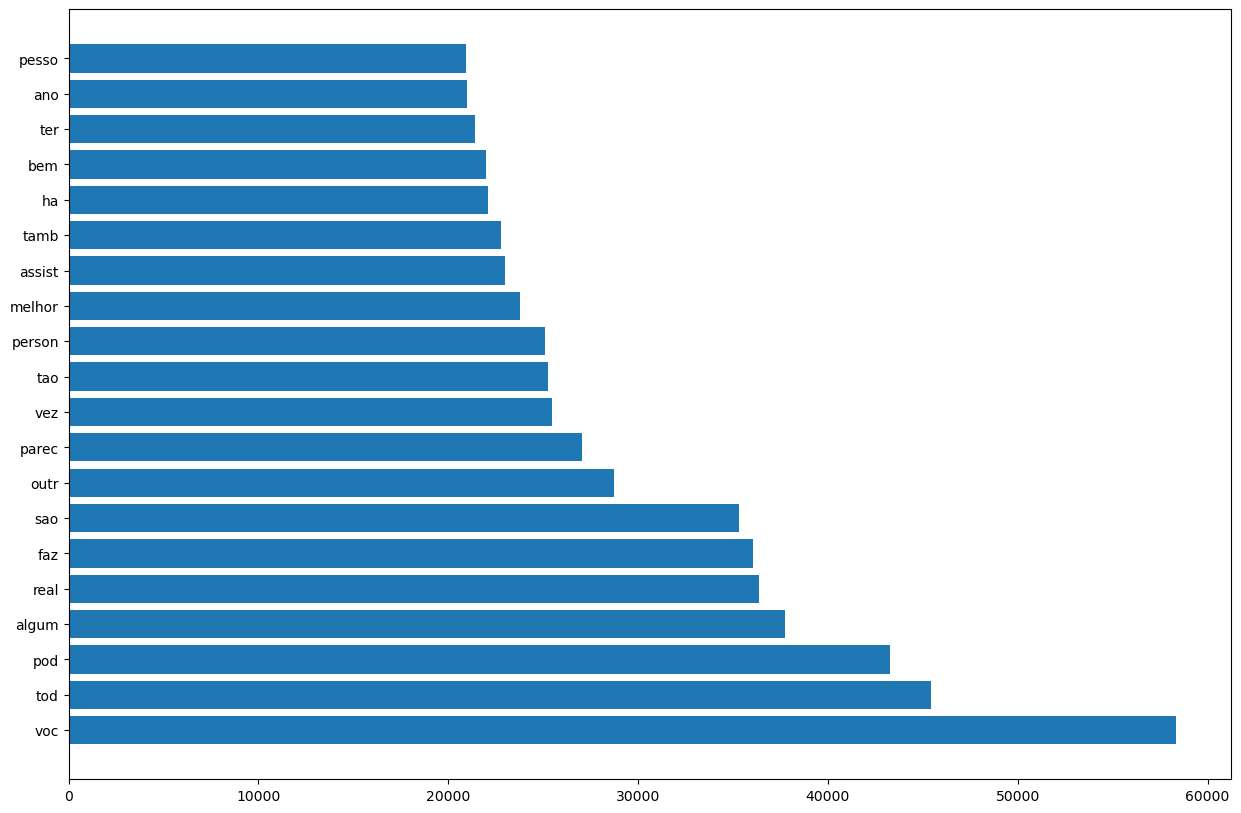

In [57]:
plt.figure(figsize=(15,10))
plt.barh(dicionario_100["palavra"], dicionario_100["frequencia"])

### Treinamento com o conjunto de dados selecionados pelo train_test_split

### Treinamento com o solver='newton-cholesky'